# オープンデータの活用(1)：気象庁データのデータ可視化
気象庁のデータの可視化，具体的には折れ線グラフ化を試みる

### 気象庁の提供するデータの形式 (CSV)：
```
ダウンロードした時刻：2020/05/30 14:07:33

,京都,京都,京都,京都,京都,京都,京都,京都,京都
年月日,平均気温(℃),平均気温(℃),平均気温(℃),最高気温(℃),最高気温(℃),最高気温(℃),最低気温(℃),最低気温(℃),最低気温(℃)
,,,,,,,,,
,,品質情報,均質番号,,品質情報,均質番号,,品質情報,均質番号
2016/1/1,5.7,8,1,10.6,8,1,2.1,8,1
2016/1/2,6.7,8,1,12.9,8,1,1.8,8,1
2016/1/3,9.3,8,1,15.8,8,1,4.7,8,1
2016/1/4,10.2,8,1,16.0,8,1,5.3,8,1
```



## Google Drive のマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 必要なライブラリ（モジュール）のインポート
CSV ファイルを扱うため csv モジュールを，また可視化のため matplotlib をインポートする。

In [ ]:
import csv # CSVファイルを扱うため
import matplotlib.pyplot as plt # 折れ線グラフを描くため

## ファイル・オープン ＆ CSVリーダーの設定
特に重要なのは CSV リーダーの設定である。これ以降，CSVリーダー "reader" に対して処理を行う。

In [ ]:
# ファイル・オープン ＆ CSVリーダーの設定
f = open("/content/drive/My Drive/BASE/OpenData/kyoto.csv", "r", encoding="shiftjis")
reader = csv.reader(f)

## ヘッダ部の読み飛ばし
気象庁から取得したデータは，その先頭（６行分）に不要な値が含まれるため，これらを読み飛ばす。具体的には CSV リーダーに対して next 関数を適用すればよい。

In [ ]:
# ヘッダ部を読み飛ばす
for i in range(6):
	next(reader)

## データ読み込み
予め日付，平均気温，最高気温，最低気温のそれぞれを格納するリストを準備し，CSV リーダーから読み込んだ結果を追加する。ここで「数字」を「数値」へ変換するため float 関数を用いる。

In [ ]:
# データ格納用のリストを準備
date = [] # 日付
heikin = [] #平均気温
saikou = [] #最高気温
saitei = [] # 最低気温

# CSV ファイルからデータ読み込み
for row in reader:
	date.append(row[0])
	heikin.append(float(row[1]))
	saikou.append(float(row[4]))
	saitei.append(float(row[7]))

## 可視化
matplotlib の plot メソッドを用いて可視化する。

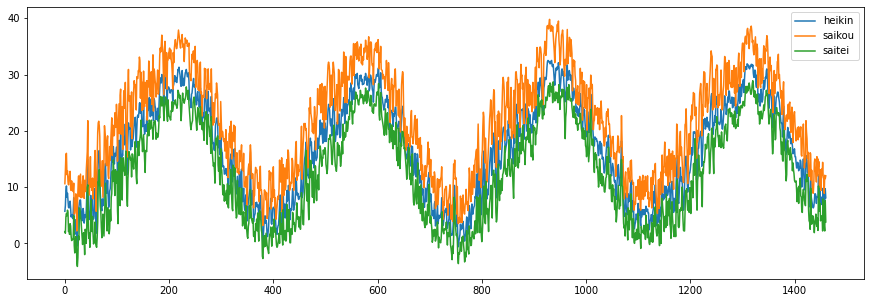

In [ ]:
# 平均気温，最高気温，最低気温のプロット
plt.figure(figsize=(15,5)) # 図のサイズを設定
plt.plot(heikin, label="heikin") # 平均気温の折れ線グラフ
plt.plot(saikou, label="saikou") # 最高気温の折れ線グラフ
plt.plot(saitei, label="saitei") # 最低気温の折れ線グラフ
plt.legend() # 凡例の表示
plt.show()

---
## 以上をまとめたコード

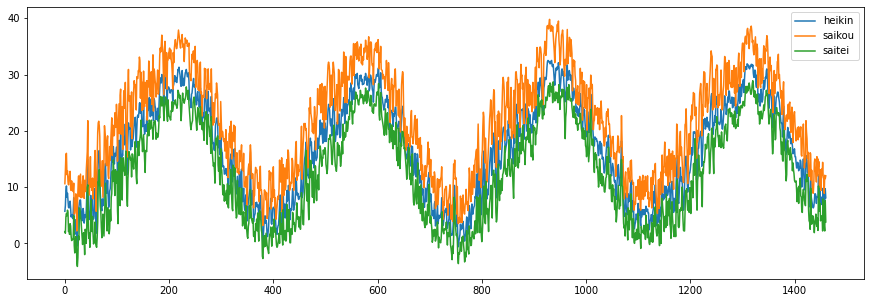

In [ ]:
'''
気象庁のデータを用いた可視化
'''
import csv # CSVファイルを扱うため
import matplotlib.pyplot as plt # 折れ線グラフを描くため

# ファイル・オープン ＆ CSVリーダーの設定
f = open("/content/drive/My Drive/BASE/OpenData/kyoto.csv", "r", encoding="shiftjis")
reader = csv.reader(f)

# ヘッダ部を読み飛ばす
for i in range(6):
	next(reader)

# データ格納用のリストを準備
date = [] # 日付
heikin = [] #平均気温
saikou = [] #最高気温
saitei = [] # 最低気温

# CSV ファイルからデータ読み込み
for row in reader:
	date.append(row[0])
	heikin.append(float(row[1]))
	saikou.append(float(row[4]))
	saitei.append(float(row[7]))

f.close()

# 平均気温，最高気温，最低気温のプロット
plt.figure(figsize=(15,5)) # 図のサイズを設定
plt.plot(heikin, label="heikin") # 平均気温の折れ線グラフ
plt.plot(saikou, label="saikou") # 最高気温の折れ線グラフ
plt.plot(saitei, label="saitei") # 最低気温の折れ線グラフ
plt.legend() # 凡例の表示
plt.show()
